## DAT405 Introduction to Data Science and AI
# Assignment 2: Regression and classification

Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | 4
Maële Belmont | 4



## Setup
Python modules need to be loaded to solve the tasks.

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from PIL import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Task 1
#### The following [web page](https://www.hemnet.se/salda/bostader?location_ids%5B%5D=940808&item_types%5B%5D=villa&sold_age=6m) lists the selling prices of villas in Landvetter that were sold in the past 6 months. Find a linear regression model that relates the living area to the selling price. (You may transcribe the values from the web page into your program or into a data file by hand, or you can write a program to do this, but don’t spend too much time doing this because “web scraping” is not the main objective of this assignment!)

Figure 1: map of different neighborhood in Landvetter


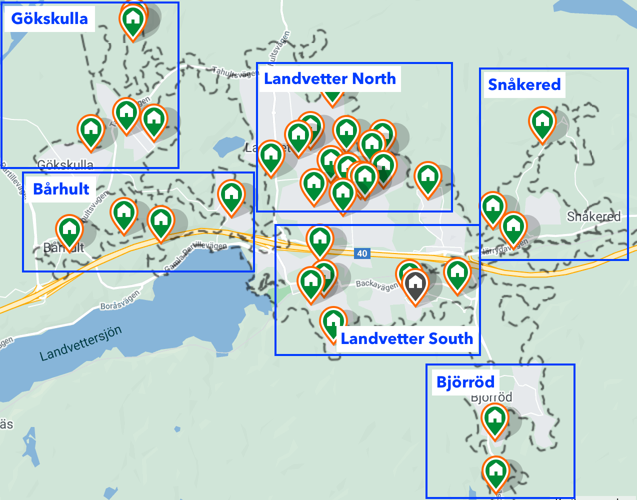

In [247]:
### Map with the living areas and their name in Landvetter
#Open image
imageMap = Image.open('map.png')
#Store image size in variables
width, height = imageMap.size
# Resize image by scaling proportionnaly (divison by 2) the height and width of the original image
imageMap = imageMap.resize((int(width/2), int(height/2)))
# Display the image
print('Figure 1: map of different neighborhood in Landvetter')
display(imageMap)

In [248]:
# Read dataframe
rawData = pd.read_csv('living-area-vs-selling-price.csv')

# Create dataframe without rows containing NaN values
finalData = rawData.dropna()

# Print figure number
print('Figure 2:')

#Create Plotly figure
#Ordinary Least Squares regression trendline 
fig = px.scatter(finalData, x='Living area (m2)', 
            y='Price (kr)', 
            color='Neighborhood', hover_data=['Adress'],
            title='Price vs. living area in Landvetter', 
            trendline='ols', trendline_scope='overall', trendline_color_override='black')
#Display figure
fig.show()

Figure 2:


#### i. What are the values of the slope and intercept of the regression line?

In [249]:
LRmodel = LinearRegression().fit(finalData[['Living area (m2)']], finalData['Price (kr)'])
slope = LRmodel.coef_
intercept = LRmodel.intercept_
print('Slope: %f \nIntercept: %f \n' %(slope, intercept))

Slope: 22477.806920 
Intercept: 2394868.386459 



#### ii. Use this model to predict the selling prices of houses which have living area $100 m^{2}$, $150 m^{2}$ and $200 m^{2}$. 

In [250]:
# Create a dictonary with the living areas
livingAreaDict = {'Living area (m2)': [100, 150, 200]}

# Create a dataframe of the dictonary
livingArea = pd.DataFrame(livingAreaDict)

# Create 'Price (kr)' column based on the regression line
livingArea['Price (kr)'] = slope*livingArea['Living area (m2)'] + intercept

# Display livingArea dataframe
print('Figure 3: dataframe with predicted selling price (kr) as a function of the living area (m2)')
display(livingArea)

Figure 3: dataframe with predicted selling price (kr) as a function of the living area (m2)


,Living area (m2),Price (kr)
0,100,4.642649e+06
1,150,5.766539e+06
2,200,6.890430e+06


#### iii. Draw a residual plot

Figure 4: 


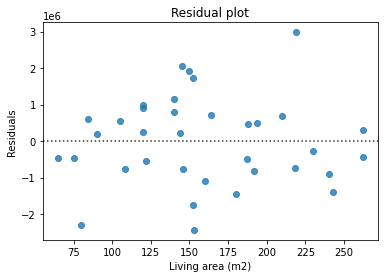

In [251]:
#Create residual plot using Seaborn
sns.residplot(data = finalData ,x = 'Living area (m2)', y = 'Price (kr)').set(title='Residual plot')

# Display the plot
print('Figure 4: ')
plt.ylabel('Residuals')
plt.show()

#### iv. Discuss the results, and how the model could be improved.

Based on figure 4, it is evident that the residuals are balanced though there is a high variance. This somewhat random pattern of the residuals suggest that a linear model would be a more appropriate fit than a non-linear one. From figure 2, we can see that there is a potential positive relationship between living area and price. With the help of a correlation analysis, we can measure the strength of the linear relationship between the two. A correlation value of approximately 0.708 indicates that there is a rather strong positive linear relationship between the two variables.

In [252]:
# Correlation between living area and price
finalData['Living area (m2)'].corr(finalData['Price (kr)']) 

0.7082424189866006

## Task 2
#### Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set. Use the one-vs-rest option to use the same setup as in the lectures for multiclass regression.

In [253]:
#Load dataset
iris = datasets.load_iris()

In [254]:
def LOG(dataset, matrix): 
    # Split dataset into training set (70%) and test set (30%)
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=1)

    #Create Logistic Classifier
    #### default value: max_iter = 100 but warning appeared 'lbfgs failed to converge' so we increased max_iter
    logReg = LogisticRegression(solver='lbfgs', max_iter=110) 

    #Train the model using the training sets
    logReg.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = logReg.predict(X_test)
    
    if matrix == 'No':
        print('---------------------------------------------------------------------------------------------------------------------')
        print('LOGISTIC CLASSIFIER')

        # Model Accuracy, how often is the classifier correct?
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    if matrix == 'Yes':
        print('---------------------------------------------------------------------------------------------------------------------')
        print('LOGISTIC CLASSIFIER - Confusion matrix:')
        # Confusion matrix
        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = metrics.accuracy_score(y_test, y_pred)
        
        plt.figure(figsize=(5,5))
        sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.yticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 10);

        plt.show()


---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER
Accuracy: 0.9777777777777777
---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER - Confusion matrix:


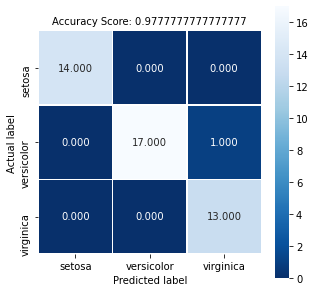

In [255]:
LOG(iris, 'No')
LOG(iris, 'Yes')

## Task 3
#### Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger  for the different cases? Why?

> **uniform** : uniform weights. All points in each neighborhood are weighted equally.

> **distance** : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In the case of uniform-based weights, the accuracy decreases when k increases. For distance-based weights, the accuracy stays constant with a high value.

In [256]:

def KNN(k, weights, dataset, matrix):
    '''
    k (int): 
    weights (string):
    dataset (dataset):
    matrix (string): ye
    '''
    # Split dataset into training set (70%) and test set (30%)
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=1)

    #Create KNN Classifier
    knn= KNeighborsClassifier(n_neighbors=k, weights=weights) 

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    
    if matrix == 'No':
        usefulValues = [k, weights, metrics.accuracy_score(y_test, y_pred)]
    
        return usefulValues
    
    if matrix == 'Yes':
        print('---------------------------------------------------------------------------------------------------------------------')
        print('KNN CLASSIFIER - k: %f, weights: %s - Confusion matrix:' %(k, weights))
        # Confusion matrix
        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = metrics.accuracy_score(y_test, y_pred)
        
        plt.figure(figsize=(5,5))
        sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.yticks(ticks=[0.5,1.5,2.5], labels=iris.target_names)
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 10);

        plt.show()

    
    

In [257]:
U1 = KNN(1, 'uniform', iris, 'No')
U40 = KNN(40, 'uniform', iris, 'No')
U105 = KNN(105, 'uniform', iris, 'No')

D1 = KNN(1, 'distance', iris, 'No')
D40 = KNN(40, 'distance', iris, 'No')
D105 = KNN(105, 'distance', iris, 'No')

comparisonDict = {'k':[U1[0], U40[0], U105[0], D1[0], D40[0], D105[0]],
        'Weights':[U1[1], U40[1], U105[1], D1[1], D40[1], D105[1]], 
        'Accuracy':[U1[2], U40[2], U105[2], D1[2], D40[2], D105[2]]}

comparisonDF = pd.DataFrame(comparisonDict)
 
# Print the output.
display(comparisonDF)

,k,Weights,Accuracy
0,1,uniform,0.977778
1,40,uniform,0.955556
2,105,uniform,0.288889
3,1,distance,0.977778
4,40,distance,0.955556
5,105,distance,0.977778


## Task 4
#### Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models. 

### Classification models comparison 

In [258]:
print('---------------------------------------------------------------------------------------------------------------------')
print('KNN CLASSIFIER')
display(comparisonDF)
LOG(iris, 'No')

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER


,k,Weights,Accuracy
0,1,uniform,0.977778
1,40,uniform,0.955556
2,105,uniform,0.288889
3,1,distance,0.977778
4,40,distance,0.955556
5,105,distance,0.977778


---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER
Accuracy: 0.9777777777777777


### Confusion Matrices

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 1.000000, weights: uniform - Confusion matrix:


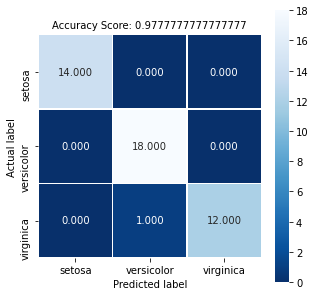

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 40.000000, weights: uniform - Confusion matrix:


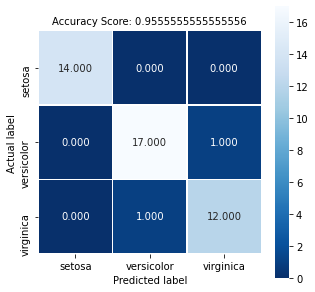

---------------------------------------------------------------------------------------------------------------------
KNN CLASSIFIER - k: 105.000000, weights: uniform - Confusion matrix:


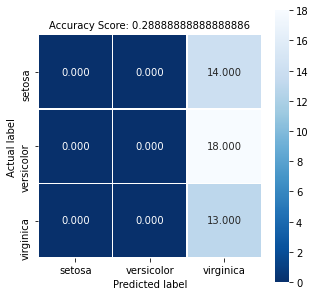

---------------------------------------------------------------------------------------------------------------------
LOGISTIC CLASSIFIER - Confusion matrix:


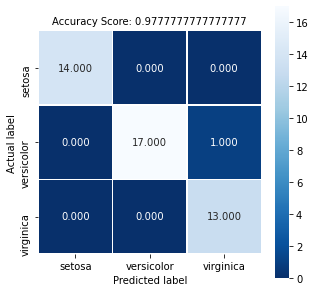

In [234]:
KNN(1, 'uniform', iris, 'Yes')
KNN(40, 'uniform', iris, 'Yes')
KNN(105, 'uniform', iris, 'Yes')
LOG(iris, 'Yes')

## Task 5
#### Explain why it is important to use a separate test (and sometimes validation) set.